### 3.7 Exercises

### 3.7.1 Algorithm Summaries



---

### Exercise 3.88. 

Starting from Taylor series prove that

$$
f^{\prime}(x) \approx \frac{f(x+h)-f(x-h)}{2 h}
$$

is a second-order approximation of the first derivative of $f(x)$. Clearly describe what "second-order approximation" means in this context.



In [ ]:
import sympy as sp

def taylor_series_expansion(f, shift, x, h, order):
    """
    Computes the Taylor series expansion of f(x + shift*h) in powers of h.
    
    Parameters:
        f     : A sympy expression for f(x). For an unspecified function,
                use sp.Function('f')(x).
        shift : A constant multiplier for h in the argument (e.g., 1 for f(x+h), 
                2 for f(x+2h), -1 for f(x-h), etc.).
        x     : A sympy symbol representing the variable x.
        h     : A sympy symbol representing the small parameter h.
        order : The highest power of h to include in the expansion.
        
    Returns:
        The Taylor series expansion of f(x + shift*h).
    """
    series_expr = 0
    for n in range(order + 1):
        term = sp.diff(f, x, n) * (shift * h)**n / sp.factorial(n)
        series_expr += term
    return sp.simplify(series_expr)

# Define symbols
x, h = sp.symbols('x h')

# Define an abstract function f(x)
f = sp.Function('f')(x)


# Expand f(x+h) to third order to capture the second error term
expansion_right = taylor_series_expansion(f, shift=1, x=x, h=h, order=3)
print("Taylor expansion for f(x+h) to O(h^3):")
sp.pprint(expansion)
# f(x+h) ≈ f(x) + h f'(x) + h^2 f''(x)/2 + h^3 f'''(x)/6

# Expand f(x-h) to third order to capture the second error term
expansion_left = taylor_series_expansion(f, shift=-1, x=x, h=h, order=3)
print("Taylor expansion for f(x+h) to O(h^3):")
sp.pprint(expansion)
# f(x-h) ≈ f(x) - h f'(x) + h^2 f''(x)/2 - h^3 f'''(x)/6

# Form the first order difference approximation:
difference_approx = sp.simplify((expansion_right - expansion_left) / (2*h))
print("\nDifference approximation (f(x+h) - f(x-h))/(2h):")
sp.pprint(difference_approx)
# This should give: f'(x) + h^2 f'''(x)/6

# To demonstrate that the approximation converges to f'(x) as h -> 0, take the limit:
limit_diff = sp.limit(difference_approx, h, 0)
print("\nLimit as h -> 0 (which equals f'(x)):")
sp.pprint(limit_diff)


Taylor expansion for f(x+h) to O(h^3):
    2                           
 2 d                            
h ⋅───(f(x))                    
     2                          
   dx            d              
──────────── + h⋅──(f(x)) + f(x)
     2           dx             
Taylor expansion for f(x+h) to O(h^3):
    2                           
 2 d                            
h ⋅───(f(x))                    
     2                          
   dx            d              
──────────── + h⋅──(f(x)) + f(x)
     2           dx             

Difference approximation (f(x+h) - f(x-h))/(2h):
    3                  
 2 d                   
h ⋅───(f(x))           
     3                 
   dx          d       
──────────── + ──(f(x))
     6         dx      

Limit as h -> 0 (which equals f'(x)):
d       
──(f(x))
dx      


The difference between the centered difference approximation and $f'(x)$ is equal to $h^2 \frac{f'''(x)}{6}$ + higher order terms.  So the error in the approximation is $O(h^2)$ which is what second order approximation means.  Decreasing $h$ by a factor of 2 decreases the error by a factor of 4.

---

### Exercise 3.89. 

Starting from Taylor series prove that

$$
f^{\prime \prime}(x) \approx \frac{f(x+h)-2 f(x)+f(x-h)}{h^{2}}
$$

is a second-order approximation of the second derivative of $f(x)$. Clearly describe what "second-order approximation" means in this context.



In [18]:
ORDER = 4

# Get the Taylor expansions for f(x+h) and f(x-h) up to order 3
expansion_plus = taylor_series_expansion(f, shift=1, x=x, h=h, order=ORDER)
expansion_minus = taylor_series_expansion(f, shift=-1, x=x, h=h, order=ORDER)

# Display the series expansions:
print("Taylor expansion for f(x+h):")
sp.pprint(expansion_plus)
print("\nTaylor expansion for f(x-h):")
sp.pprint(expansion_minus)

# Form the centered difference approximation for f''(x):
# (f(x+h) - 2f(x) + f(x-h)) / h^2
centered_diff = sp.simplify((expansion_plus - 2*f + expansion_minus) / h**2)
print("\nCentered difference approximation for f''(x):")
sp.pprint(centered_diff)

# To show that the error terms vanish as h -> 0, take the limit:
limit_expr = sp.limit(centered_diff, h, 0)
print("\nTaking the limit as h -> 0 yields:")
sp.pprint(limit_expr)


Taylor expansion for f(x+h):
    4              3              2                           
 4 d            3 d            2 d                            
h ⋅───(f(x))   h ⋅───(f(x))   h ⋅───(f(x))                    
     4              3              2                          
   dx             dx             dx            d              
──────────── + ──────────── + ──────────── + h⋅──(f(x)) + f(x)
     24             6              2           dx             

Taylor expansion for f(x-h):
    4              3              2                           
 4 d            3 d            2 d                            
h ⋅───(f(x))   h ⋅───(f(x))   h ⋅───(f(x))                    
     4              3              2                          
   dx             dx             dx            d              
──────────── - ──────────── + ──────────── - h⋅──(f(x)) + f(x)
     24             6              2           dx             

Centered difference approximation for f''(x):
    4       

Second order approximation means that approximation error is about $h^2 \frac{f^{(4)}(x)}{12}$ or $O(h^2).$


---

### 3.7.2 Applying What You've Learned

### Exercise 3.97. 

For each of the following numerical differentiation formulas (A) prove that the formula is true and (B) find the order of the method. To prove that each of the formulas is true you will need to write the Taylor series for all of the terms in the numerator on the right and then simplify to solve for the necessary derivative. The highest power of the remainder should reveal the order of the method. Simplifying hint: You may want to leverage Python's `sympy` library to do some of the algebra for you.

1. $f^{\prime}(x) \approx \displaystyle \frac{\frac{1}{12} f(x-2 h)-\frac{2}{3} f(x-h)+\frac{2}{3} f(x+h)-\frac{1}{12} f(x+2 h)}{h}$


2. $f^{\prime}(x) \approx \displaystyle \frac{-\frac{3}{2} f(x)+2 f(x+h)-\frac{1}{2} f(x+2 h)}{h}$


3. $f^{\prime \prime}(x) \approx \displaystyle \frac{-\frac{1}{12} f(x-2 h)+\frac{4}{3} f(x-h)-\frac{5}{2} f(x)+\frac{4}{3} f(x+h)-\frac{1}{12} f(x+2 h)}{h^{2}}$


4. $f^{\prime \prime \prime}(x) \approx \displaystyle \frac{-\frac{1}{2} f(x-2 h)+f(x-h)-f(x+h)+\frac{1}{2} f(x+2 h)}{h^{3}}$




In [ ]:
# Code for part 1

# Define symbols
x, h = sp.symbols('x h')

# Define an abstract function f(x)
f = sp.Function('f')(x)

ORDER = 5

# add up the expansions
expansion  = (1/12)*taylor_series_expansion(f, shift=-2, x=x, h=h, order=ORDER)
expansion += (-2/3)*taylor_series_expansion(f, shift=-1, x=x, h=h, order=ORDER)
expansion += (2/3)*taylor_series_expansion(f, shift=1, x=x, h=h, order=ORDER)
expansion += (-1/12)*taylor_series_expansion(f, shift=2, x=x, h=h, order=ORDER)

# simplify the expression and print it
expansion = sp.simplify(expansion / h)
sp.pprint(expansion)

# To show that the error terms vanish as h -> 0, take the limit:
limit_expr = sp.limit(expansion, h, 0)
print("\nTaking the limit as h -> 0 yields:")
sp.pprint(limit_expr)

                         5                                                  
                      4 d               d          4.16333634234434e-17⋅f(x)
- 0.0333333333333333⋅h ⋅───(f(x)) + 1.0⋅──(f(x)) + ─────────────────────────
                          5             dx                     h            
                        dx                                                  

Taking the limit as h -> 0 yields:
∞⋅sign(f(x))


by ignoring the terms which are essentaially 0 (4.16e-17) we can see that the difference approximation gives $f'(x) + O(h^4)$

In [10]:
# Code for part 3

# Define symbols
x, h = sp.symbols('x h')

# Define an abstract function f(x)
f = sp.Function('f')(x)

ORDER = 6

# add up the expansions
expansion  = (-1/12)*taylor_series_expansion(f, shift=-2, x=x, h=h, order=ORDER)
expansion += (4/3)*taylor_series_expansion(f, shift=-1, x=x, h=h, order=ORDER)
expansion += (-5/2)*f
expansion += (4/3)*taylor_series_expansion(f, shift=1, x=x, h=h, order=ORDER)
expansion += (-1/12)*taylor_series_expansion(f, shift=2, x=x, h=h, order=ORDER)

# simplify the expression and print it
expansion = sp.simplify(expansion / h**2)
sp.pprint(expansion)

                                                                         d     ↪
                         6               2          8.32667268468867e-17⋅──(f( ↪
                      4 d               d                                dx    ↪
- 0.0111111111111111⋅h ⋅───(f(x)) + 1.0⋅───(f(x)) + ────────────────────────── ↪
                          6               2                       h            ↪
                        dx              dx                                     ↪

↪                                
↪ x))                            
↪       6.93889390390723e-17⋅f(x)
↪ ─── - ─────────────────────────
↪                   2            
↪                  h             

Taking the limit as h -> 0 yields:
-∞⋅sign(f(x))


by ignoring the terms that are essentially 0 we can see that this difference approximation gives $f''(x) + O(h^4)$


---

### Exercise 3.98. 

Write a function that accepts the path to a *.csv file with $(x,y)$ pairs.  Read the data from the file, compute a first order approximation to the first derivative and return two numpy arrays: x, and df.  Where x is the x-coordinate at each point and df is the derivative approximation.  Note that x and df will be of the same length which should be one less than the length of the input data.  Create a test spreadsheet file, call your function to compute the derivative and plot the results to show you're computing the correct derivative. 

Use this code to help you get started:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 21 equally spaced points between -1 and 1
x = np.linspace(-1, 1, 21)
# Compute y = x^3 - x for each x
y = x**3 - x

# Create a DataFrame with the results
df = pd.DataFrame({'x': x, 'y': y})

# Write the DataFrame to a CSV file
df.to_csv('points.csv', index=False)


def square_points_from_file(file_path):
    # Read the data from the CSV file
    data = pd.read_csv(file_path)
    
    x = data.iloc[:,0].to_numpy()
    y = data.iloc[:,1].to_numpy()

    return x, y**2

x, y_squared = square_points_from_file('points.csv')
plt.plot(x, y_squared, marker='o')
plt.xlabel('x')
plt.ylabel('y^2')
plt.title('y = x^3 - x')
plt.grid()
```


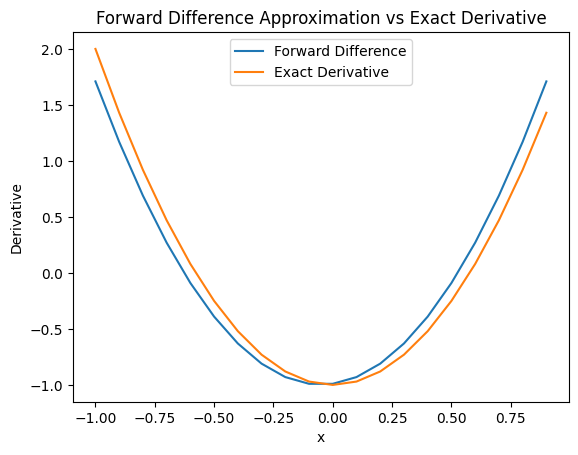

In [6]:
import pandas as pd

def forward_difference_from_file(file_path):
    # Read the data from the CSV file
    data = pd.read_csv(file_path)
    
    x = data.iloc[:,0].to_numpy()
    y = data.iloc[:,1].to_numpy()

    h = x[1] - x[0]
    forward_diff = y[1:]-y[:-1]
    forward_diff /= h
    return x[:-1], forward_diff

# now let's use the file from above that has x and y=f(x)=x^3-x stored at 21 points
x, forward_diff = forward_difference_from_file('points.csv')
import matplotlib.pyplot as plt
plt.plot(x, forward_diff, label='Forward Difference')
plt.plot(x, 3*x**2-1, label='Exact Derivative')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend()
plt.title('Forward Difference Approximation vs Exact Derivative')
plt.show()